In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import mlflow.sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [42]:
data = pd.read_csv("Data/data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [43]:
data.drop(["id"],axis=1, inplace = True)

In [44]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [45]:
data["Unnamed: 32"].unique()
data.drop(["Unnamed: 32"], axis=1, inplace = True)

In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["diagnosis"] = le.fit_transform(data["diagnosis"])

In [47]:
data["diagnosis"].unique()

array([1, 0])

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [49]:
import mlflow
from azureml.core import Workspace

In [53]:
ws = Workspace.from_config(_file_name='config.json')
mlflow.set_tracking_uri(ws.get_mlflow_tracking_uri())

UserErrorException: UserErrorException:
	Message: You are currently logged-in to 7d76d361-8277-4708-a477-64e8366cd1bc tenant. You don't have access to de5b26f3-b6ce-47cd-a291-0004d9ab88bb subscription, please check if it is in this tenant. All the subscriptions that you have access to in this tenant are = 
 [SubscriptionInfo(subscription_name='Azure for Students', subscription_id='bdad271e-2ad8-46b6-8e5f-bc7a3fe9998b')]. 
 Please refer to aka.ms/aml-notebook-auth for different authentication mechanisms in azureml-sdk.
	InnerException None
	ErrorResponse 
{
    "error": {
        "code": "UserError",
        "message": "You are currently logged-in to 7d76d361-8277-4708-a477-64e8366cd1bc tenant. You don't have access to de5b26f3-b6ce-47cd-a291-0004d9ab88bb subscription, please check if it is in this tenant. All the subscriptions that you have access to in this tenant are = \n [SubscriptionInfo(subscription_name='Azure for Students', subscription_id='bdad271e-2ad8-46b6-8e5f-bc7a3fe9998b')]. \n Please refer to aka.ms/aml-notebook-auth for different authentication mechanisms in azureml-sdk."
    }
}

In [ ]:
#mlflow.set_tracking_uri("http://localhost:5001")
experiment_name="BCA_experiment"
mlflow.set_experiment(experiment_name)

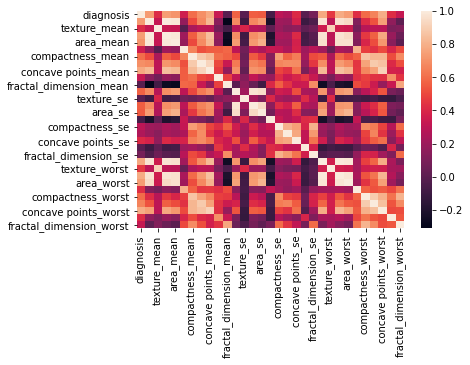

In [54]:
sns.heatmap(data.corr())
plt.savefig("HeatMap")
plt.show()

In [55]:
corr_cutoff = .7
top_corrs = list(data.corr()[(data.corr()>corr_cutoff) | (data.corr()<-corr_cutoff)].diagnosis.dropna().index)
top_corrs

['diagnosis',
 'radius_mean',
 'perimeter_mean',
 'area_mean',
 'concave points_mean',
 'radius_worst',
 'perimeter_worst',
 'area_worst',
 'concave points_worst']

In [ ]:
sns.heatmap(data[top_corrs].corr(),vmin=0)

In [ ]:
from sklearn.model_selection import train_test_split
#top_corrs.remove("diagnosis")
X = data.drop(top_corrs,axis=1)
y = data["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

test_models = [LogisticRegression(random_state = 0),
            KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2),
            SVC(kernel = 'rbf', random_state = 0),
            GaussianNB(),
            DecisionTreeClassifier(criterion="entropy", random_state=0),
            RandomForestClassifier(n_estimators=100, criterion="entropy", random_state=0)]


In [ ]:
def model_test(Model):
    model_type = type(Model).__name__
    print(model_type)
    Model.fit(X_train, y_train)

    run_name = "Basic " + model_type + " Experiment"
    print(run_name)
    with mlflow.start_run(run_name=run_name) as run:

        Model.fit(X_train, y_train)
        y_pred = Model.predict(X_test)

        cm = confusion_matrix(y_test, y_pred)
        print(cm)

        df_cm = pd.DataFrame(cm, index = ["T", "F"],
                  columns = ["T", "F"])
        plt.figure(figsize = (5,5))
        sns.heatmap(df_cm, annot=True)
        figname = "Confusion_Matrix_" + model_type
        # Log CM
        plt.savefig(figname)
        mlflow.log_artifact("CMs/"+figname+".png")

        score = accuracy_score(y_test, y_pred)

        # Log model
        mlflow.sklearn.log_model(Model, model_type+"-model")

        # Create metrics
        print(f"score: {score}")

        # Log metrics
        mlflow.log_metric("score", score)

        runID = run.info.run_uuid
        experimentID = run.info.experiment_id

        print(f"Inside MLflow Run with run_id `{runID}` and experiment_id `{experimentID}`")

In [ ]:
for model in test_models:
    model_test(model)